In [1]:
import pandas as pd

df = pd.read_csv("wsn.csv")
df.head()

,Node_ID,Protocol,Attack_Type,Packet_Drop_Rate,Energy_Level,Cluster_Head,Transmission_Power,Time_Slot_Assigned,Label
0,1,LEACH,Flooding,0.12,21,False,3.61,4,1
1,2,LEACH,Flooding,0.15,43,True,3.92,6,1
2,3,LEACH,Normal,0.05,80,True,1.10,1,0
3,4,LEACH,Grayhole,0.67,51,True,1.19,5,1
4,5,LEACH,Normal,0.00,93,False,1.37,9,0


In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Make a copy to avoid altering original
data = df.copy()

# Encode categorical features
data['Protocol'] = LabelEncoder().fit_transform(data['Protocol'])
data['Attack_Type'] = LabelEncoder().fit_transform(data['Attack_Type'])
data['Cluster_Head'] = data['Cluster_Head'].astype(int)  # convert bool to int

# Split into features and label
X = data.drop(['Node_ID', 'Label'], axis=1)  # Features
y = data['Label']                            # Target (0: normal, 1: attack)

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 1.0
Confusion Matrix:
 [[10048     0]
 [    0  9952]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10048
           1       1.00      1.00      1.00      9952

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



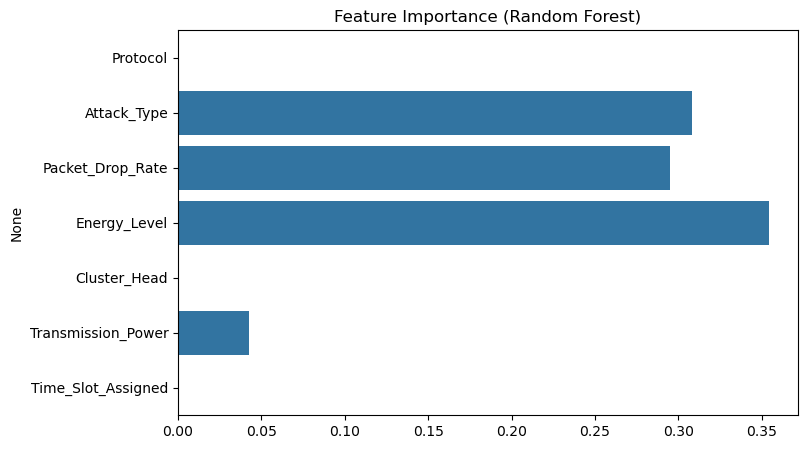

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rf.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.show()

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model
model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10


C:\Users\SACHIN CHAVALAGI\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9534 - loss: 0.1564 - val_accuracy: 1.0000 - val_loss: 5.4980e-04
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 1.0000 - loss: 3.6659e-04 - val_accuracy: 1.0000 - val_loss: 1.1777e-04
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 9.1339e-05 - val_accuracy: 1.0000 - val_loss: 4.3727e-05
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 3.5519e-05 - val_accuracy: 1.0000 - val_loss: 1.9886e-05
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 1.6849e-05 - val_accuracy: 1.0000 - val_loss: 9.9447e-06
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 8.6813e-06 - val_accuracy: 1.0000 - val_loss: 5.2542e-06
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 4.5001e-06 - val_accuracy: 1.0000 - val_loss: 2.8629e-06
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/

In [7]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nNeural Network Test Accuracy: {accuracy:.4f}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 5.0877e-07

Neural Network Test Accuracy: 1.0000


In [8]:
from sklearn.metrics import classification_report

# Predict on test data
y_pred_dl = model.predict(X_test)
y_pred_dl = (y_pred_dl > 0.5).astype(int)  # convert probabilities to 0/1

# Report
print(classification_report(y_test, y_pred_dl))


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10048
           1       1.00      1.00      1.00      9952

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



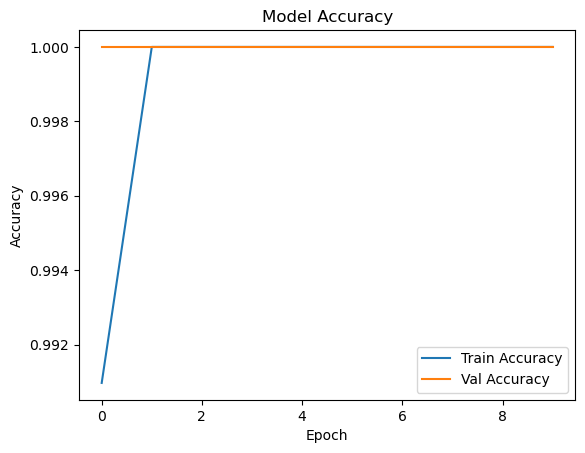

In [9]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 5.0877e-07
Model Accuracy: 100.00%


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, auc, f1_score
)
from sklearn.preprocessing import label_binarize


In [12]:
# Train the model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


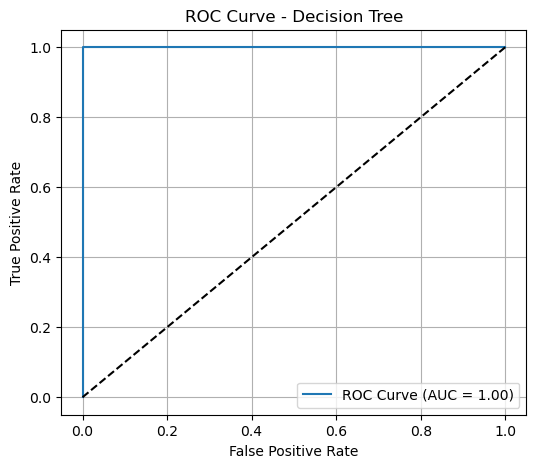

In [13]:
# Binarize labels
y_test_bin = label_binarize(y_test, classes=[0, 1])
y_score = dt.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test_bin, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


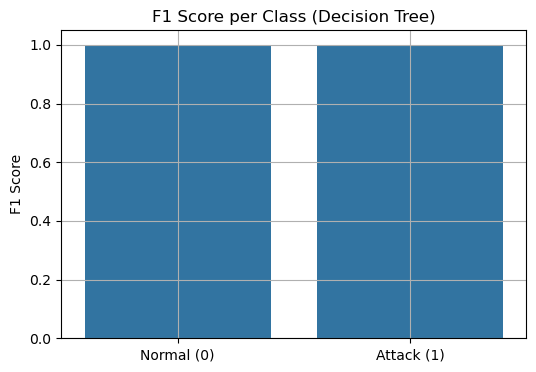

In [14]:
f1_scores = f1_score(y_test, y_pred_dt, average=None)

# Class names: 0 = Normal, 1 = Attack
class_labels = ['Normal (0)', 'Attack (1)']

plt.figure(figsize=(6, 4))
sns.barplot(x=class_labels, y=f1_scores)
plt.title("F1 Score per Class (Decision Tree)")
plt.ylabel("F1 Score")
plt.ylim(0, 1.05)
plt.grid(True)
plt.show()

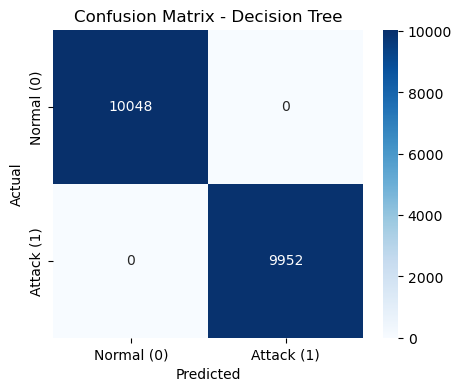

In [15]:
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


In [5]:
import pandas as pd  # ✅ Import pandas first

df = pd.read_csv("wsn.csv")  # ✅ Then read the CSV
print(df.head())             # ✅ Check first few rows



   Node_ID Protocol Attack_Type  Packet_Drop_Rate  Energy_Level  Cluster_Head  \
0        1    LEACH    Flooding              0.12            21         False   
1        2    LEACH    Flooding              0.15            43          True   
2        3    LEACH      Normal              0.05            80          True   
3        4    LEACH    Grayhole              0.67            51          True   
4        5    LEACH      Normal              0.00            93         False   

   Transmission_Power  Time_Slot_Assigned  Label  
0                3.61                   4      1  
1                3.92                   6      1  
2                1.10                   1      0  
3                1.19                   5      1  
4                1.37                   9      0  


In [8]:
# Step 1: Import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# Step 2: Load data
df = pd.read_csv("wsn.csv")

# Step 3: Copy data
data = df.copy()

# Step 4: Encode categorical columns
data['Protocol'] = LabelEncoder().fit_transform(data['Protocol'])
data['Attack_Type'] = LabelEncoder().fit_transform(data['Attack_Type'])
data['Cluster_Head'] = data['Cluster_Head'].astype(int)

# Step 5: Split features and label
X = data.drop(['Node_ID', 'Label'], axis=1)
y = data['Label']

# Step 6: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_scaled, y)

# Step 8: Check new class balance
print(pd.Series(y_smote).value_counts())


Label
1    50086
0    50086
Name: count, dtype: int64


In [11]:
from sklearn.model_selection import train_test_split

# Use your SMOTE-resampled data (X_smote, y_smote) if you already applied SMOTE
# If not, use X_scaled and y

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_smote, y_smote, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (80137, 7)
Test shape: (20035, 7)


In [12]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42))
]
stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier(n_estimators=50)
)
stack_model.fit(X_train, y_train)
y_pred_stack = stack_model.predict(X_test)


In [14]:
# Import first!
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)


Epoch 1/20


C:\Users\SACHIN CHAVALAGI\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1002/1002 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9500 - loss: 0.1391 - val_accuracy: 1.0000 - val_loss: 5.0585e-05
Epoch 2/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 3.0201e-04 - val_accuracy: 1.0000 - val_loss: 6.2809e-06
Epoch 3/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 9.7200e-05 - val_accuracy: 1.0000 - val_loss: 1.6322e-06
Epoch 4/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 3.4872e-05 - val_accuracy: 1.0000 - val_loss: 5.1227e-07
Epoch 5/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 3.0314e-05 - val_accuracy: 1.0000 - val_loss: 1.9787e-07
Epoch 6/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 8.8975e-06 - val_accuracy: 1.0000 - val_loss: 7.9389e-08
Epoch 7/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 5.9210e-06 - val_accuracy: 1.0000 - val_loss: 3.1240e-08
Epoch 8/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/

In [16]:
print(data.columns)



Index(['Node_ID', 'Protocol', 'Attack_Type', 'Packet_Drop_Rate',
       'Energy_Level', 'Cluster_Head', 'Transmission_Power',
       'Time_Slot_Assigned', 'Label'],
      dtype='object')


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, matthews_corrcoef, accuracy_score, classification_report

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Metrics
roc_auc = roc_auc_score(y_test, y_pred_rf)
mcc = matthews_corrcoef(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print(f"ROC-AUC: {roc_auc:.3f}")
print(f"MCC: {mcc:.3f}")



Random Forest Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10118
           1       1.00      1.00      1.00      9917

    accuracy                           1.00     20035
   macro avg       1.00      1.00      1.00     20035
weighted avg       1.00      1.00      1.00     20035

ROC-AUC: 1.000
MCC: 1.000


In [23]:
from sklearn.tree import DecisionTreeClassifier

# Train DT
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict
y_pred_dt = dt.predict(X_test)

# Evaluate (optional)
from sklearn.metrics import accuracy_score
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 1.0


In [25]:
loss, accuracy = model.evaluate(X_test, y_test)


627/627 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 2.9583e-13


In [26]:
# Evaluate neural network on test data
loss, accuracy_nn = model.evaluate(X_test, y_test)
print(f"Neural Network Accuracy: {accuracy_nn:.4f}")


627/627 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 2.9583e-13
Neural Network Accuracy: 1.0000


In [27]:
models = ['RF', 'DT', 'NN', 'Stack']
accuracies = [
    accuracy_score(y_test, y_pred_rf), 
    accuracy_score(y_test, y_pred_dt),
    accuracy_nn,   # ✅ now use this variable
    accuracy_score(y_test, y_pred_stack)
]


In [29]:
!pip install shap



   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 545.3/545.3 kB 9.1 MB/s eta 0:00:00


In [33]:
print(type(shap_values))
print(len(shap_values))
print(np.array(shap_values).shape)


<class 'numpy.ndarray'>
20035
(20035, 7, 2)


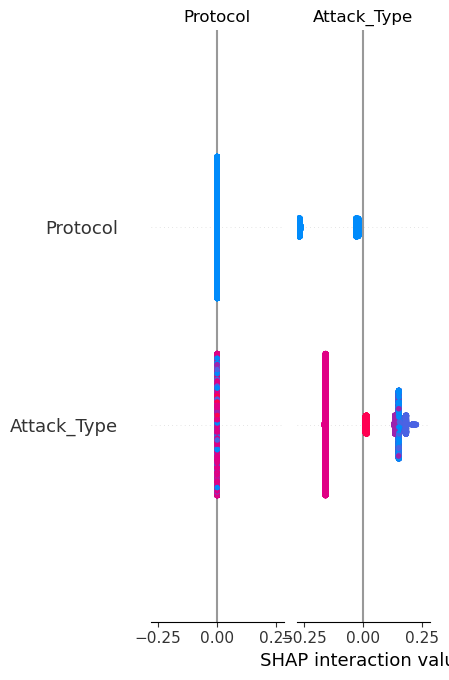

In [34]:
# Only use shap_values[1] if it's a list
if isinstance(shap_values, list):
    shap.summary_plot(shap_values[1], X_test, feature_names=X.columns)
else:
    shap.summary_plot(shap_values, X_test, feature_names=X.columns)


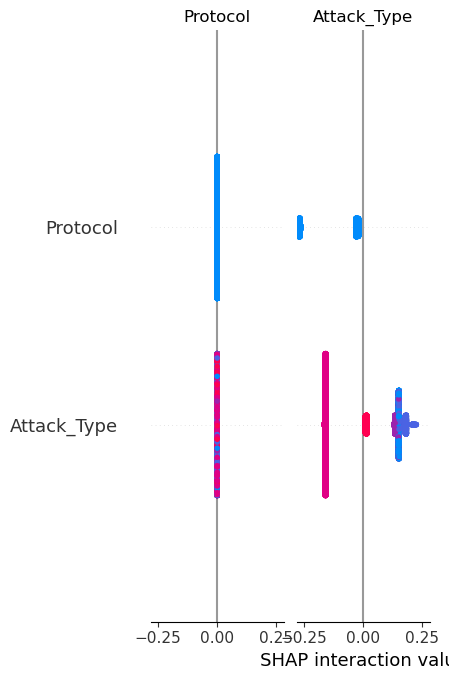

In [35]:
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


<class 'numpy.ndarray'>


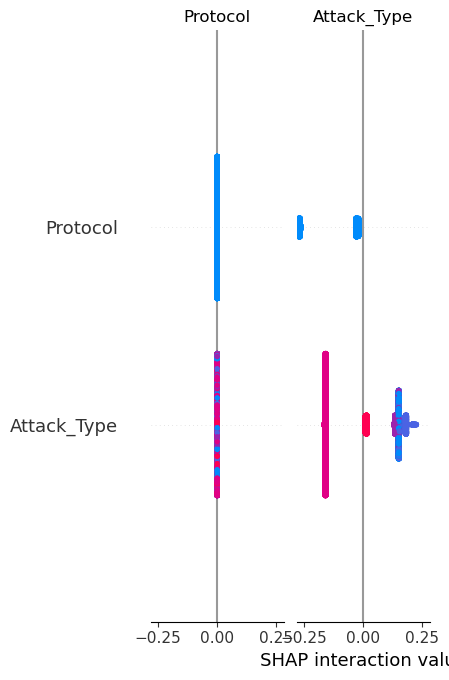

In [36]:
import shap

# Create explainer
explainer = shap.TreeExplainer(rf)

# Get SHAP values
shap_values = explainer.shap_values(X_test)

# Check type and length
print(type(shap_values))
if isinstance(shap_values, list):
    print(f"List of length: {len(shap_values)}")
    # Usually, index 1 is the "attack" class
    shap.summary_plot(shap_values[1], X_test, feature_names=X.columns)
else:
    # Single array case
    shap.summary_plot(shap_values, X_test, feature_names=X.columns)


   Node_ID Protocol Attack_Type  Packet_Drop_Rate  Energy_Level  Cluster_Head  \
0        1    LEACH    Flooding              0.12            21         False   
1        2    LEACH    Flooding              0.15            43          True   
2        3    LEACH      Normal              0.05            80          True   
3        4    LEACH    Grayhole              0.67            51          True   
4        5    LEACH      Normal              0.00            93         False   

   Transmission_Power  Time_Slot_Assigned  Label  
0                3.61                   4      1  
1                3.92                   6      1  
2                1.10                   1      0  
3                1.19                   5      1  
4                1.37                   9      0  


C:\Users\SACHIN CHAVALAGI\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


627/627 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 2.8868e-12
627/627 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step
   Model  Accuracy  F1_Score  ROC_AUC  MCC
0     RF       1.0       1.0      1.0  1.0
1     DT       1.0       1.0      1.0  1.0
2     NN       1.0       1.0      1.0  1.0
3  Stack       1.0       1.0      1.0  1.0


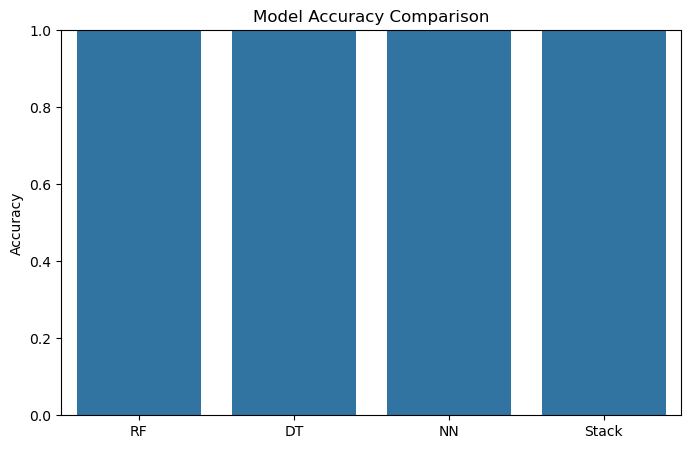

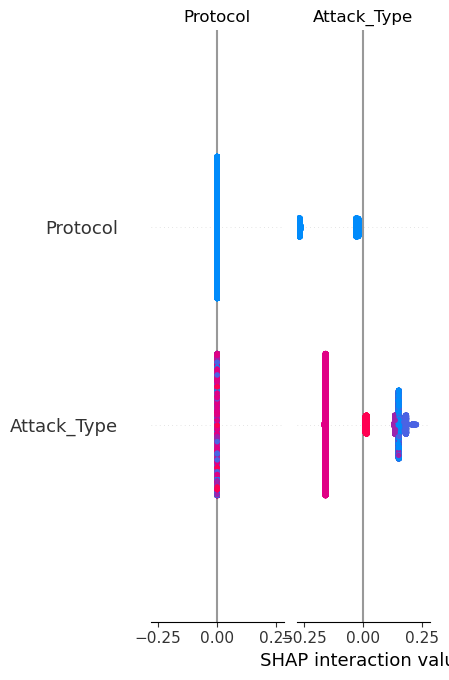

✅ All steps completed! You can now compare with your base paper results.


In [37]:
# ============================
# 📄 1️⃣ IMPORTS
# ============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, matthews_corrcoef, f1_score

from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import shap

# ============================
# 📄 2️⃣ LOAD DATA
# ============================
df = pd.read_csv("wsn.csv")
print(df.head())

# ============================
# 🏷️ 3️⃣ ENCODING
# ============================
data = df.copy()

if 'Protocol' in data.columns:
    data['Protocol'] = LabelEncoder().fit_transform(data['Protocol'])
if 'Attack_Type' in data.columns:
    data['Attack_Type'] = LabelEncoder().fit_transform(data['Attack_Type'])

if 'Cluster_Head' in data.columns:
    data['Cluster_Head'] = data['Cluster_Head'].astype(int)

# ============================
# 🟠 4️⃣ FEATURES & TARGET
# ============================
X = data.drop(['Node_ID', 'Label'], axis=1, errors='ignore')
y = data['Label']

# ============================
# ⚖️ 5️⃣ SCALING + SMOTE
# ============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_scaled, y)

# ============================
# ✂️ 6️⃣ TRAIN-TEST SPLIT
# ============================
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# ============================
# 🌳 7️⃣ RANDOM FOREST
# ============================
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# ============================
# 🌲 8️⃣ DECISION TREE
# ============================
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# ============================
# 🤖 9️⃣ NEURAL NETWORK
# ============================
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=0)
loss, accuracy_nn = model.evaluate(X_test, y_test)
y_pred_nn = (model.predict(X_test) > 0.5).astype(int)

# ============================
# 🏗️ 🔥 10️⃣ STACKING MODEL
# ============================
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42))
]
stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier(n_estimators=50, random_state=42)
)
stack_model.fit(X_train, y_train)
y_pred_stack = stack_model.predict(X_test)

# ============================
# 📊 1️⃣1️⃣ EVALUATION & COMPARISON
# ============================
models = ['RF', 'DT', 'NN', 'Stack']
accuracies = [
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_dt),
    accuracy_nn,
    accuracy_score(y_test, y_pred_stack)
]
f1_scores = [
    f1_score(y_test, y_pred_rf),
    f1_score(y_test, y_pred_dt),
    f1_score(y_test, y_pred_nn),
    f1_score(y_test, y_pred_stack)
]
roc_aucs = [
    roc_auc_score(y_test, y_pred_rf),
    roc_auc_score(y_test, y_pred_dt),
    roc_auc_score(y_test, y_pred_nn),
    roc_auc_score(y_test, y_pred_stack)
]
mccs = [
    matthews_corrcoef(y_test, y_pred_rf),
    matthews_corrcoef(y_test, y_pred_dt),
    matthews_corrcoef(y_test, y_pred_nn),
    matthews_corrcoef(y_test, y_pred_stack)
]

summary_df = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracies,
    "F1_Score": f1_scores,
    "ROC_AUC": roc_aucs,
    "MCC": mccs
})
print(summary_df)

# ============================
# 📈 1️⃣2️⃣ COMPARISON PLOT
# ============================
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies)
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.show()

# ============================
# 💡 1️⃣3️⃣ SHAP EXPLAINABILITY
# ============================
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

if isinstance(shap_values, list):
    shap.summary_plot(shap_values[1], X_test, feature_names=X.columns)
else:
    shap.summary_plot(shap_values, X_test, feature_names=X.columns)

print("✅ All steps completed! You can now compare with your base paper results.")



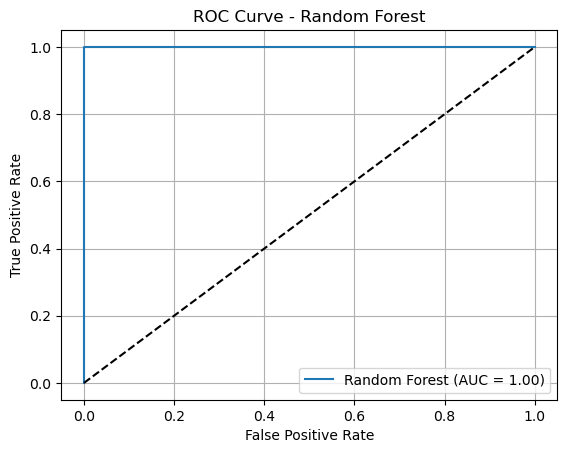

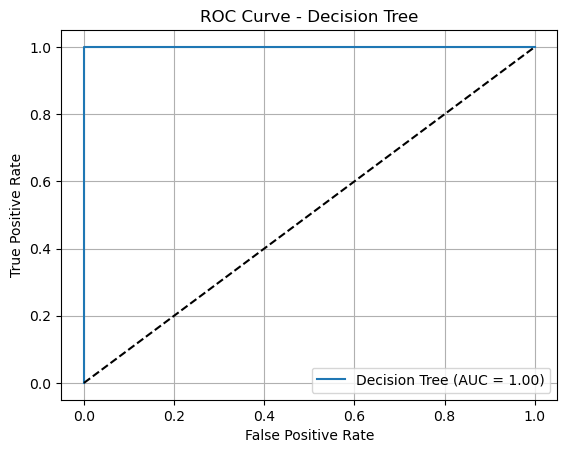

627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step


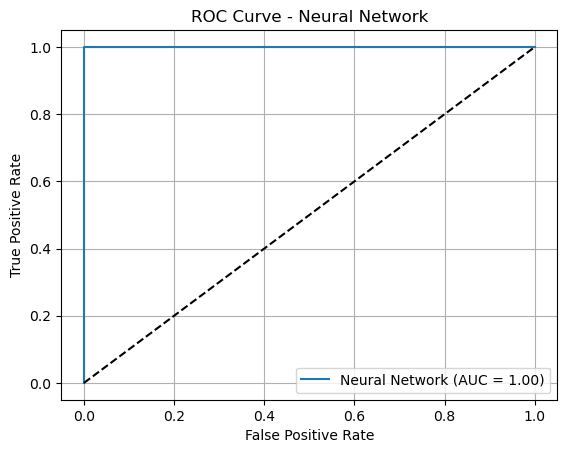

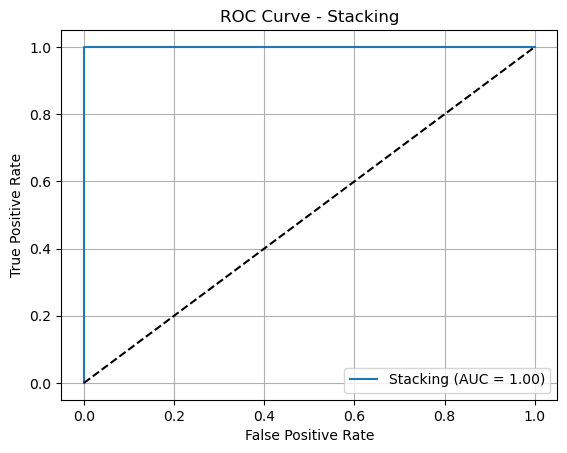

In [38]:
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay

# Helper function to plot ROC curve
def plot_roc(y_test, y_pred_prob, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc_score(y_test, y_pred_prob):.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# RF
y_prob_rf = rf.predict_proba(X_test)[:, 1]
plot_roc(y_test, y_prob_rf, "Random Forest")

# DT
y_prob_dt = dt.predict_proba(X_test)[:, 1]
plot_roc(y_test, y_prob_dt, "Decision Tree")

# NN
y_prob_nn = model.predict(X_test).flatten()
plot_roc(y_test, y_prob_nn, "Neural Network")

# Stack
y_prob_stack = stack_model.predict_proba(X_test)[:, 1]
plot_roc(y_test, y_prob_stack, "Stacking")


In [42]:
import numpy as np

# Check columns first
print("Columns before adding simulated features:", data.columns)

# Create synthetic columns if they do not exist
if 'Packets' not in data.columns:
    np.random.seed(42)
    data['Packets'] = np.random.randint(50, 500, size=len(data))

if 'Bytes' not in data.columns:
    data['Bytes'] = np.random.randint(1000, 5000, size=len(data))

if 'Time_Window' not in data.columns:
    data['Time_Window'] = np.random.uniform(1, 10, size=len(data))

if 'Initial_Energy' not in data.columns:
    data['Initial_Energy'] = np.random.uniform(90, 100, size=len(data))

if 'Energy' not in data.columns:
    data['Energy'] = data['Initial_Energy'] - np.random.uniform(0, 10, size=len(data))

if 'Packets_Sent' not in data.columns:
    data['Packets_Sent'] = data['Packets'] + np.random.randint(0, 10, size=len(data))

if 'Packets_Received' not in data.columns:
    data['Packets_Received'] = data['Packets']

# Derive new features
data['Packet_Rate'] = data['Packets'] / (data['Time_Window'] + 1e-5)
data['Avg_Packet_Size'] = data['Bytes'] / (data['Packets'] + 1e-5)
data['Energy_Rate'] = (data['Initial_Energy'] - data['Energy']) / (data['Time_Window'] + 1e-5)
data['Drop_Rate'] = (data['Packets_Sent'] - data['Packets_Received']) / (data['Packets_Sent'] + 1e-5)

print("Columns after adding new features:", data.columns)



Columns before adding simulated features: Index(['Node_ID', 'Protocol', 'Attack_Type', 'Packet_Drop_Rate',
       'Energy_Level', 'Cluster_Head', 'Transmission_Power',
       'Time_Slot_Assigned', 'Label'],
      dtype='object')
Columns after adding new features: Index(['Node_ID', 'Protocol', 'Attack_Type', 'Packet_Drop_Rate',
       'Energy_Level', 'Cluster_Head', 'Transmission_Power',
       'Time_Slot_Assigned', 'Label', 'Packets', 'Bytes', 'Time_Window',
       'Initial_Energy', 'Energy', 'Packets_Sent', 'Packets_Received',
       'Packet_Rate', 'Avg_Packet_Size', 'Energy_Rate', 'Drop_Rate'],
      dtype='object')


In [43]:
# Re-define X and y
X = data.drop(['Node_ID', 'Label'], axis=1, errors='ignore')
y = data['Label']

# Re-normalize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_scaled, y)

# Split again
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)


In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [45]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


In [46]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42))
]

stack_model = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=50, random_state=42))
stack_model.fit(X_train, y_train)
y_pred_stack = stack_model.predict(X_test)


In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=0)

# Predict
y_pred_dl = (model.predict(X_test) > 0.5).astype(int)


C:\Users\SACHIN CHAVALAGI\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


627/627 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [48]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, matthews_corrcoef

# RF
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rf))
print("MCC:", matthews_corrcoef(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\n")

# DT
print("Decision Tree:")
print(classification_report(y_test, y_pred_dt))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_dt))
print("MCC:", matthews_corrcoef(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\n")

# Stack
print("Stacking:")
print(classification_report(y_test, y_pred_stack))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_stack))
print("MCC:", matthews_corrcoef(y_test, y_pred_stack))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))
print("\n")

# NN
print("Deep Neural Network:")
print(classification_report(y_test, y_pred_dl))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_dl))
print("MCC:", matthews_corrcoef(y_test, y_pred_dl))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dl))


Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10018
           1       1.00      1.00      1.00     10017

    accuracy                           1.00     20035
   macro avg       1.00      1.00      1.00     20035
weighted avg       1.00      1.00      1.00     20035

ROC-AUC: 1.0
MCC: 1.0
Confusion Matrix:
 [[10018     0]
 [    0 10017]]


Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10018
           1       1.00      1.00      1.00     10017

    accuracy                           1.00     20035
   macro avg       1.00      1.00      1.00     20035
weighted avg       1.00      1.00      1.00     20035

ROC-AUC: 1.0
MCC: 1.0
Confusion Matrix:
 [[10018     0]
 [    0 10017]]


Stacking:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10018
           1       1.00      1.00      1.00     1

Number of shap_values elements: 20035


C:\Users\SACHIN CHAVALAGI\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
C:\Users\SACHIN CHAVALAGI\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


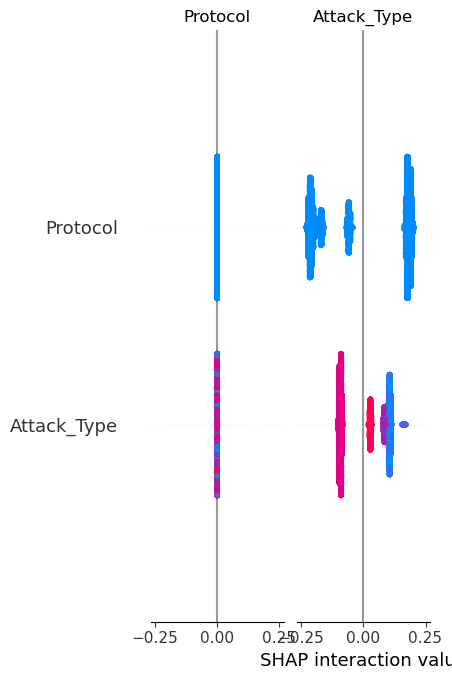

In [55]:
import shap
import numpy as np

# Your existing code: assuming you have already trained a RandomForest classifier called `rf`

# Create explainer
explainer = shap.TreeExplainer(rf)

# Compute SHAP values
shap_values = explainer.shap_values(X_test)

# Check shapes to avoid error
print("Number of shap_values elements:", len(shap_values))

if isinstance(shap_values, list):
    print("Shape of shap_values[0]:", shap_values[0].shape)
    if len(shap_values) > 1:
        print("Shape of shap_values[1]:", shap_values[1].shape)
    print("Shape of X_test:", X_test.shape)

    # Pick the one that matches
    if shap_values[0].shape[1] == X_test.shape[1]:
        shap_to_use = shap_values[0]
    else:
        shap_to_use = shap_values[1]
else:
    # If shap_values is a single array (e.g., regression)
    shap_to_use = shap_values

# Create random generator to avoid FutureWarning
rng = np.random.default_rng(42)

# Plot
shap.summary_plot(shap_to_use, X_test, feature_names=X.columns, rng=rng)




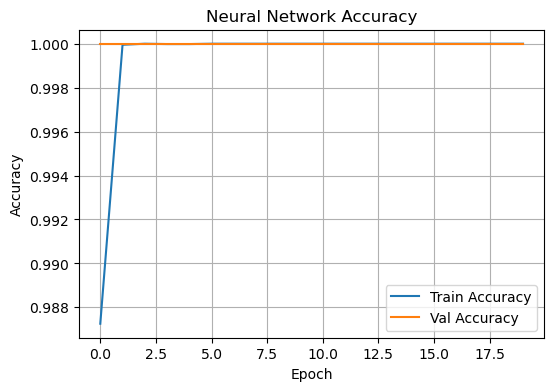

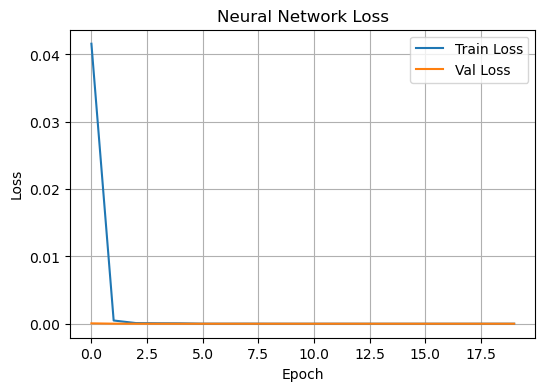

In [50]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Neural Network Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Neural Network Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


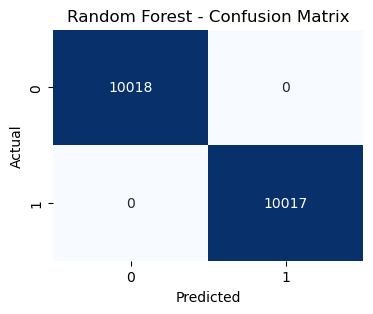

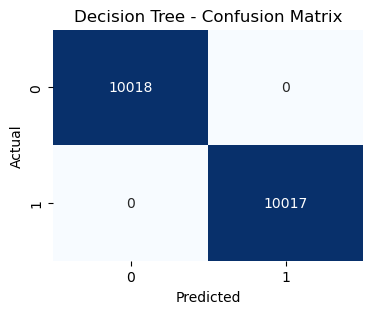

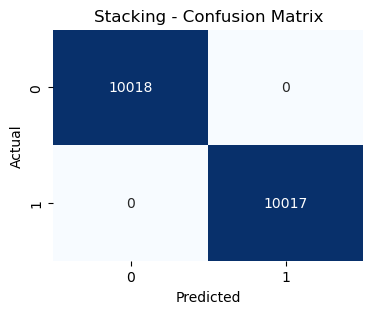

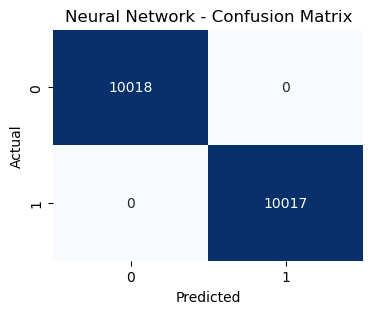

In [56]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

models_preds = {
    'Random Forest': y_pred_rf,
    'Decision Tree': y_pred_dt,
    'Stacking': y_pred_stack,
    'Neural Network': y_pred_dl
}

for name, preds in models_preds.items():
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


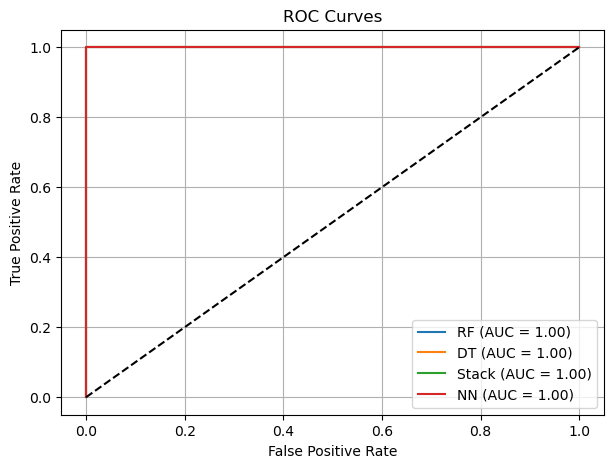

In [57]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(7, 5))

# RF
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f"RF (AUC = {roc_auc_rf:.2f})")

# DT
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, label=f"DT (AUC = {roc_auc_dt:.2f})")

# Stack
fpr_stack, tpr_stack, _ = roc_curve(y_test, y_pred_stack)
roc_auc_stack = auc(fpr_stack, tpr_stack)
plt.plot(fpr_stack, tpr_stack, label=f"Stack (AUC = {roc_auc_stack:.2f})")

# NN
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_dl)
roc_auc_nn = auc(fpr_nn, tpr_nn)
plt.plot(fpr_nn, tpr_nn, label=f"NN (AUC = {roc_auc_nn:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


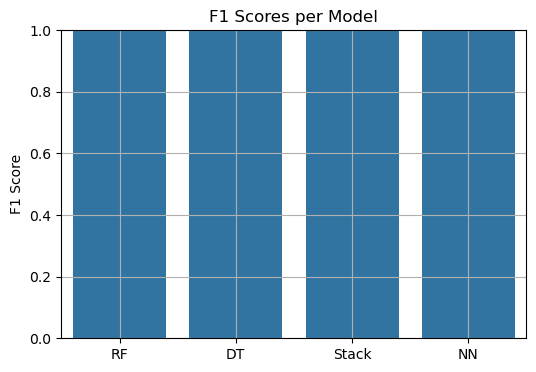

In [58]:
from sklearn.metrics import f1_score

f1_rf = f1_score(y_test, y_pred_rf)
f1_dt = f1_score(y_test, y_pred_dt)
f1_stack = f1_score(y_test, y_pred_stack)
f1_nn = f1_score(y_test, y_pred_dl)

model_names = ['RF', 'DT', 'Stack', 'NN']
f1_scores = [f1_rf, f1_dt, f1_stack, f1_nn]

plt.figure(figsize=(6, 4))
sns.barplot(x=model_names, y=f1_scores)
plt.title("F1 Scores per Model")
plt.ylim(0, 1)
plt.ylabel("F1 Score")
plt.grid(True)
plt.show()


C:\Users\SACHIN CHAVALAGI\AppData\Local\Temp\ipykernel_35772\2396101645.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, feature_names=X.columns)
C:\Users\SACHIN CHAVALAGI\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
C:\Users\SACHIN CHAVALAGI\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.


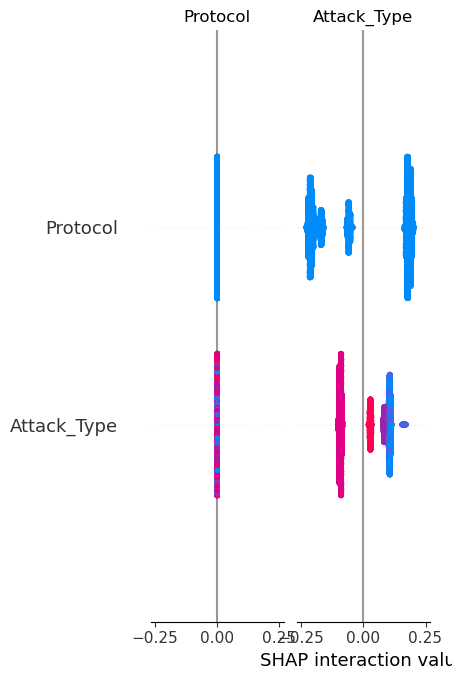

In [60]:
shap.summary_plot(shap_values, X_test, feature_names=X.columns)



In [62]:
import shap

# Create SHAP explainer for your trained Random Forest model
explainer = shap.TreeExplainer(rf)

# Compute SHAP values for X_test
shap_values = explainer.shap_values(X_test)


In [63]:
print("Type of shap_values:", type(shap_values))
if isinstance(shap_values, list):
    for i, val in enumerate(shap_values):
        print(f"shap_values[{i}] shape: {val.shape}")
else:
    print("shap_values shape:", shap_values.shape)

print("X_test shape:", X_test.shape)


Type of shap_values: <class 'numpy.ndarray'>
shap_values shape: (20035, 18, 2)
X_test shape: (20035, 18)


✅ Using shap_values directly


C:\Users\SACHIN CHAVALAGI\AppData\Local\Temp\ipykernel_35772\1811493753.py:10: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, feature_names=X.columns)
C:\Users\SACHIN CHAVALAGI\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
C:\Users\SACHIN CHAVALAGI\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.

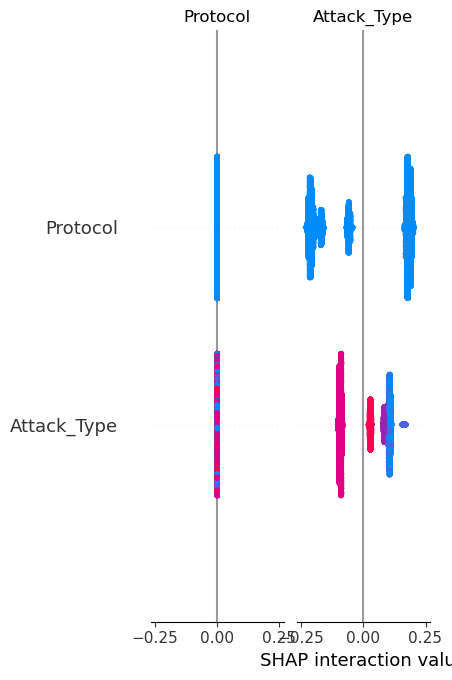

In [64]:
if isinstance(shap_values, list):
    for i, sv in enumerate(shap_values):
        if sv.shape[1] == X_test.shape[1]:
            print(f"✅ Using shap_values[{i}] with shape {sv.shape}")
            shap.summary_plot(sv, X_test, feature_names=X.columns)
            break
else:
    if shap_values.shape[1] == X_test.shape[1]:
        print("✅ Using shap_values directly")
        shap.summary_plot(shap_values, X_test, feature_names=X.columns)


In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# --- Decision Tree ---
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# --- Random Forest ---
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# --- Create table ---
metrics_table = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [acc_dt, acc_rf],
    'Precision': [prec_dt, prec_rf],
    'Recall': [rec_dt, rec_rf],
    'F1 Score': [f1_dt, f1_rf]
})

# Display
print(metrics_table)


           Model  Accuracy  Precision  Recall  F1 Score
0  Decision Tree       1.0        1.0     1.0       1.0
1  Random Forest       1.0        1.0     1.0       1.0


In [68]:
from sklearn.metrics import classification_report
import pandas as pd

# --- Decision Tree report ---
report_dt = classification_report(y_test, y_pred_dt, output_dict=True, zero_division=0)

# --- Random Forest report ---
report_rf = classification_report(y_test, y_pred_rf, output_dict=True, zero_division=0)

# Get all unique class labels (excluding avg keys)
class_labels = [lbl for lbl in report_dt.keys() if lbl not in ['accuracy', 'macro avg', 'weighted avg']]

# List to store rows
rows = []

# Per-class metrics
for label in class_labels:
    row = {
        "Class": label,
        "Precision_DT": round(report_dt[label]['precision'] * 100, 2),
        "Precision_RF": round(report_rf[label]['precision'] * 100, 2),
        "Recall_DT": round(report_dt[label]['recall'] * 100, 2),
        "Recall_RF": round(report_rf[label]['recall'] * 100, 2),
        "F1_DT": round(report_dt[label]['f1-score'] * 100, 2),
        "F1_RF": round(report_rf[label]['f1-score'] * 100, 2)
    }
    rows.append(row)

# Add macro average
row_macro = {
    "Class": "Macro avg",
    "Precision_DT": round(report_dt['macro avg']['precision'] * 100, 2),
    "Precision_RF": round(report_rf['macro avg']['precision'] * 100, 2),
    "Recall_DT": round(report_dt['macro avg']['recall'] * 100, 2),
    "Recall_RF": round(report_rf['macro avg']['recall'] * 100, 2),
    "F1_DT": round(report_dt['macro avg']['f1-score'] * 100, 2),
    "F1_RF": round(report_rf['macro avg']['f1-score'] * 100, 2)
}
rows.append(row_macro)

# Add weighted average
row_weighted = {
    "Class": "Weighted avg",
    "Precision_DT": round(report_dt['weighted avg']['precision'] * 100, 2),
    "Precision_RF": round(report_rf['weighted avg']['precision'] * 100, 2),
    "Recall_DT": round(report_dt['weighted avg']['recall'] * 100, 2),
    "Recall_RF": round(report_rf['weighted avg']['recall'] * 100, 2),
    "F1_DT": round(report_dt['weighted avg']['f1-score'] * 100, 2),
    "F1_RF": round(report_rf['weighted avg']['f1-score'] * 100, 2)
}
rows.append(row_weighted)

# Create DataFrame
table = pd.DataFrame(rows)

# Optional: Add overall accuracy columns
acc_dt = round(report_dt['accuracy'] * 100, 2)
acc_rf = round(report_rf['accuracy'] * 100, 2)
table["Accuracy_DT"] = acc_dt
table["Accuracy_RF"] = acc_rf

# Display
pd.set_option("display.max_rows", None)
print(table)


          Class  Precision_DT  Precision_RF  Recall_DT  Recall_RF  F1_DT  \
0             0         100.0         100.0      100.0      100.0  100.0   
1             1         100.0         100.0      100.0      100.0  100.0   
2     Macro avg         100.0         100.0      100.0      100.0  100.0   
3  Weighted avg         100.0         100.0      100.0      100.0  100.0   

   F1_RF  Accuracy_DT  Accuracy_RF  
0  100.0        100.0        100.0  
1  100.0        100.0        100.0  
2  100.0        100.0        100.0  
3  100.0        100.0        100.0  


In [69]:
print(sorted(set(y_test)))


[0, 1]


In [70]:
target_names = ['Normal', 'Blackhole', 'Flooding', 'Grayhole', 'TDMA']


In [72]:
print("Unique classes in y_test:", sorted(set(y_test)))


Unique classes in y_test: [0, 1]


In [74]:
print("Unique classes in y_test:", sorted(set(y_test)))



Unique classes in y_test: [0, 1]


In [78]:
print(report_dt.keys())


dict_keys(['0', '1', 'accuracy', 'macro avg', 'weighted avg'])


In [80]:
labels = ['0', '1']


In [81]:
label_map = {'0': 'Normal', '1': 'Attack'}


In [82]:
rows = []

for key in ['0', '1']:
    row = {
        "Class": label_map[key],
        "Precision_DT": round(report_dt[key]['precision'] * 100, 2),
        "Precision_RF": round(report_rf[key]['precision'] * 100, 2),
        "Recall_DT": round(report_dt[key]['recall'] * 100, 2),
        "Recall_RF": round(report_rf[key]['recall'] * 100, 2),
        "F1_DT": round(report_dt[key]['f1-score'] * 100, 2),
        "F1_RF": round(report_rf[key]['f1-score'] * 100, 2),
    }
    rows.append(row)

# Add macro avg
row_macro = {
    "Class": "Macro Avg",
    "Precision_DT": round(report_dt['macro avg']['precision'] * 100, 2),
    "Precision_RF": round(report_rf['macro avg']['precision'] * 100, 2),
    "Recall_DT": round(report_dt['macro avg']['recall'] * 100, 2),
    "Recall_RF": round(report_rf['macro avg']['recall'] * 100, 2),
    "F1_DT": round(report_dt['macro avg']['f1-score'] * 100, 2),
    "F1_RF": round(report_rf['macro avg']['f1-score'] * 100, 2),
}

rows.append(row_macro)

# Weighted avg
row_weighted = {
    "Class": "Weighted Avg",
    "Precision_DT": round(report_dt['weighted avg']['precision'] * 100, 2),
    "Precision_RF": round(report_rf['weighted avg']['precision'] * 100, 2),
    "Recall_DT": round(report_dt['weighted avg']['recall'] * 100, 2),
    "Recall_RF": round(report_rf['weighted avg']['recall'] * 100, 2),
    "F1_DT": round(report_dt['weighted avg']['f1-score'] * 100, 2),
    "F1_RF": round(report_rf['weighted avg']['f1-score'] * 100, 2),
}

rows.append(row_weighted)

# Create dataframe
final_table = pd.DataFrame(rows)
print(final_table)


          Class  Precision_DT  Precision_RF  Recall_DT  Recall_RF  F1_DT  \
0        Normal         100.0         100.0      100.0      100.0  100.0   
1        Attack         100.0         100.0      100.0      100.0  100.0   
2     Macro Avg         100.0         100.0      100.0      100.0  100.0   
3  Weighted Avg         100.0         100.0      100.0      100.0  100.0   

   F1_RF  
0  100.0  
1  100.0  
2  100.0  
3  100.0  


In [83]:
label_map = {
    '0': 'Normal',
    '2': 'Blackhole',
    '3': 'Flooding'
}


In [85]:
print(report_dt.keys())
print(report_rf.keys())


dict_keys(['0', '1', 'accuracy', 'macro avg', 'weighted avg'])
dict_keys(['0', '1', 'accuracy', 'macro avg', 'weighted avg'])


In [87]:
print(report_dt.keys())


dict_keys(['0', '1', 'accuracy', 'macro avg', 'weighted avg'])


In [91]:
print("Keys in Decision Tree report:", report_dt.keys())
print("Keys in Random Forest report:", report_rf.keys())


Keys in Decision Tree report: dict_keys(['0', '1', 'accuracy', 'macro avg', 'weighted avg'])
Keys in Random Forest report: dict_keys(['0', '1', 'accuracy', 'macro avg', 'weighted avg'])
